In [1]:
import sys
sys.path.append('..')
import ugent

import matplotlib.pyplot as plt
import matplotlib as mpl

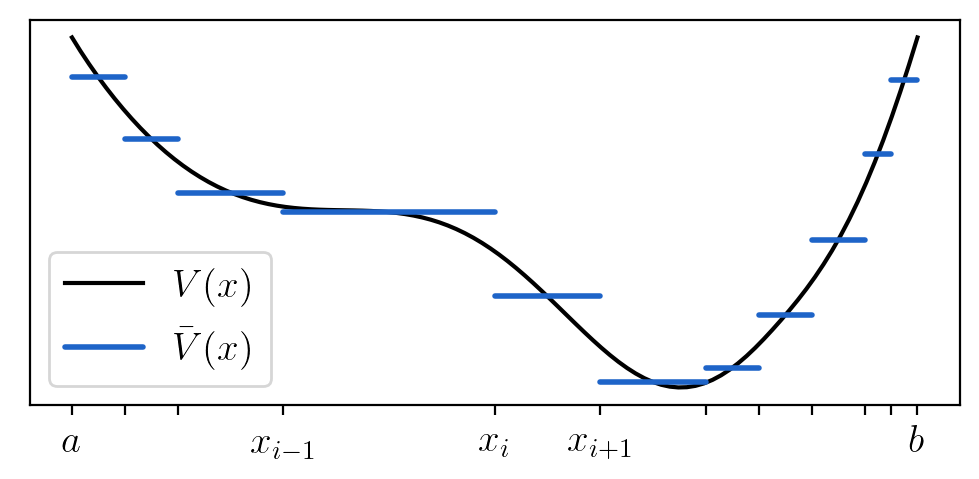

In [2]:
import numpy as np
from math import pi

def V(x):
    return (np.sin(x**1.6*2*pi)+1)**1.52 + (4*(x-.5))**2

fig, ax = plt.subplots(figsize=(6, 2.5), dpi=200)

xs = np.linspace(0, 1, 100)
ax.plot(xs, V(xs), c=ugent.zwart, label="$V(x)$")

def get_intervals(V, a, b, eps=0.1):
    if abs(V(a) - V(b)) < eps and abs(V((a+b)/2) - V(b)) < eps/2:
        yield (a, b)
    else:
        c = (a+b)/2
        yield from get_intervals(V, a, c, eps=eps)
        yield from get_intervals(V, c, b, eps=eps)

intervals = list(get_intervals(V, 0, 1, eps=1.2))

for i, (a, b) in enumerate(intervals):
    v = V((a+b)/2)
    kwargs = dict(c=ugent.blauw, lw=2, solid_capstyle="round")
    if i == 0:
        kwargs["label"] = "$\\bar{V}(x)$"
    ax.plot((a, b), (v, v), **kwargs)


ticks = sorted(set(sum(intervals, ())))
blank_ticks = len(ticks)-5
o = blank_ticks//2-1
ax.yaxis.set_ticks([])
ax.xaxis.set_ticks(ticks)
ax.xaxis.set_ticklabels(
    ['$a$']
    + ['']*o
    + ['$x_{i-1}$', '$x_{i}$', '$x_{i+1}$']
    + ['']*(blank_ticks-o)
    + ['$b$'])
ax.legend()

plt.savefig('cpm_constant_approx.pdf', bbox_inches="tight")